In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
# import streamlit as st
import stats
import preprocess
from urlextract import URLExtract
from collections import Counter
import emoji
# import streamlit as st
from datetime import datetime

C:\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [5]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
# f = open('Tecnoesis_Marketing_Team.txt','r',encoding='utf-8')

data = 'Tecnoesis_Marketing_Team.txt'
# dummy = data.split('\n')
# dummy


# uploaded_file=open('Tecnoesis_Marketing_Team.txt')

# bytes_data = uploaded_file
    
# converting the bytecode to the text-file

# data = bytes_data.decode("utf-8")

# sending the file data to the preprocess function for further functioning

df = preprocess.preprocess(data)
df

,Date,Time,User,Message,Month,Year,Month_num,Day,Day_name,Hour,Minute
0,10/06/2022,9:26pm,Swaraj Pal Kesari Bhaiya,@919678639378 add saare jinka list diya tha,June,2022,6,10,Friday,21,26
1,10/06/2022,9:27pm,Swaraj Pal Kesari Bhaiya,And jo srijan wali group mein respond kiye,June,2022,6,10,Friday,21,27
2,10/06/2022,9:27pm,Mrinal Kalita,Yes bhaiya,June,2022,6,10,Friday,21,27
3,11/06/2022,10:45am,Swaraj Pal Kesari Bhaiya,"Guys, I'll explain the work a little while la...",June,2022,6,11,Saturday,10,45
4,11/06/2022,11:38am,Kiran,"Hello everyone. Myself, Kiran Sarmah, from t...",June,2022,6,11,Saturday,11,38
...,...,...,...,...,...,...,...,...,...,...,...
1331,25/12/2022,2:17pm,Swaraj Pal Kesari Bhaiya,Okay. Which stage are you currently in there?,December,2022,12,25,Sunday,14,17
1332,25/12/2022,2:17pm,Swaraj Pal Kesari Bhaiya,Has the work started?,December,2022,12,25,Sunday,14,17
1333,25/12/2022,2:20pm,Manish Sharma,Database collection. Just started bhaiya. Jun...,December,2022,12,25,Sunday,14,20
1334,25/12/2022,2:20pm,Swaraj Pal Kesari Bhaiya,The dates are finalised?,December,2022,12,25,Sunday,14,20


In [4]:
user_list = df['User'].unique().tolist()
    
user_list.sort()
    
user_list.insert(0, "Overall")

print(user_list)

['Overall', ' Abhijit NITS', ' Abhinav', ' Agneesh', ' Arunangshu NITS', ' Debottam', ' Depayon Ghosh', ' Hemdutt Mishra Bhaiya', ' Kiran', ' Mainur', ' Manav Sanghi Bhaiya', ' Manish Sharma', ' Mayur Mulchadini Bhaiya', ' Mrinal Kalita', ' Neha', ' Poshith', ' Prateek Vij Bhaiya', ' Prohelika', ' Rishabh Saket', ' Sakshi', ' SanjeeT PanjiyaR', ' Sayahnneeta', ' Shayan Das', ' Shruti Saxena', ' Swaraj Pal Kesari Bhaiya']


In [5]:
num_messages, num_words, media_omitted, links = stats.fetchstats(' Mrinal Kalita', df)
print(num_messages, num_words, media_omitted, links)

77 434 0 0


In [17]:
busycount, newdf = stats.fetchbusyuser(df)
# count = df['User'].value_counts().head()
# newdf = pd.DataFrame((df['User'].value_counts() / df.shape[0]) * 100)
print(busycount)
# newdf
# fig, ax = plt.subplots()
# ax.bar(busycount.index, busycount.values, color='red')
# plt.xticks(rotation='vertical')
# plt.pyplot(fig)
# plt.show()

User
 Swaraj Pal Kesari Bhaiya    502
 Sakshi                      113
 Mrinal Kalita                77
 Kiran                        73
 Mainur                       73
Name: count, dtype: int64


In [18]:

newdf

,count
User,
Swaraj Pal Kesari Bhaiya,37.574850
Sakshi,8.458084
Mrinal Kalita,5.763473
Kiran,5.464072
Mainur,5.464072
Agneesh,5.089820
Rishabh Saket,4.715569
Manav Sanghi Bhaiya,3.068862
Poshith,2.994012


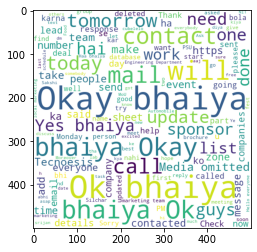

In [19]:
df_img = stats.createwordcloud('Overall', df)
fig, ax = plt.subplots()
ax.imshow(df_img)

In [20]:
most_common_df = stats.getcommonwords('Overall', df)
most_common_df

,0,1
0,bhaiya,503
1,mail,54
2,call,52
3,make,39
4,marketing,39
5,team,38
6,contact,38
7,contacts,34
8,<media,34
9,omitted>,34


In [22]:
emoji_df = stats.getemojistats('Overall', df)
emoji_df

,Emoji,Count
0,🙂,11
1,✨,9
2,🔥,9
3,🏻,8
4,🥳,4
5,❤,4
6,😂,4
7,💫,3
8,🙃,3
9,👍,3


In [24]:
time = stats.monthtimeline('Overall', df)
time

,Year,Month_num,Month,Message,Time
0,2022,6,June,171,June-2022
1,2022,7,July,124,July-2022
2,2022,8,August,317,August-2022
3,2022,9,September,399,September-2022
4,2022,10,October,304,October-2022
5,2022,11,November,9,November-2022
6,2022,12,December,12,December-2022


In [26]:
busy_day = stats.weekactivitymap('Overall', df)
busy_day

Day_name
Tuesday      235
Monday       221
Saturday     215
Sunday       208
Wednesday    193
Thursday     148
Friday       116
Name: count, dtype: int64

In [27]:
busy_month = stats.monthactivitymap('Overall', df)
busy_month

Month
September    399
August       317
October      304
June         171
July         124
December      12
November       9
Name: count, dtype: int64